In [7]:
# Cargar librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Unidades
deg = np.pi/180
m = 1
cm = 0.01*m
N = 1
kN = 1000*N
MN = 1e6*N
Pa = 1
kPa = 1e3*Pa
MPa = 1e6*Pa

In [3]:
# Funcion de capacidad ultima
def f_qu_h(D, phi, c, gamma, z):
    sigma_v = gamma*z
    A = 0.25*np.pi*(D**2)
    
    # Calculo de factores de carga
    Nq = np.exp(np.pi*np.tan(phi)) * np.tan(0.25*np.pi+0.5*phi)**2
    Nc = (Nq-1)/np.tan(phi)


    # Calculo de factores de forma
    sc = 1 + Nq/Nc
    sq = 1 + np.sin(phi)

    # Calculo de factores de profundidad
    dc = 1 + 0.4*np.arctan(z/D)
    dq = 1 + 2*np.tan(phi)*((1-np.sin(phi))**2)*np.arctan(z/D)
    
    # Calculo de capacidad ultima
    qu = c*Nc*sc*dc + sigma_v*Nq*sq*dq
    Qu = qu*A
    return Qu

In [4]:
# Parametros de resistencia
phi = 27*deg
c = 0*kPa
gamma = 10*kPa

# Parametros geometricos
z = 10*m
D = 80*cm

In [5]:
# Función de probabilidad del ángulo de fricción
phi_min = 28*deg
phi_ave = 30*deg
phi_max = 35*deg
phi_std = 3*deg

i = 0
N = 1000
conf = 0.95
phi_arr=np.zeros(N)

while i<N:
    phi_va = np.random.normal(phi_ave,phi_std)
    phi_arr[i] = phi_va
    i = i + 1

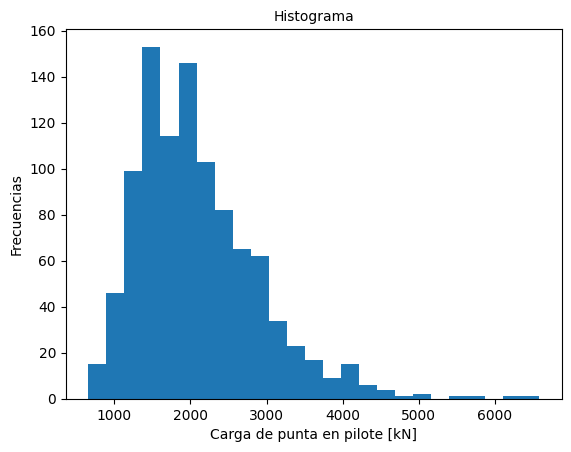

In [6]:
# Calculo de capacidad ultima
Qu_arr = np.zeros(N)
i = 0
while i<N:
    Qu_arr[i] = f_qu_h(D, phi_arr[i], c, gamma, z)
    i = i + 1

# Ordenamiento del vector
Qu_ord = Qu_arr[Qu_arr.argsort()]

# Histograma de capacidad ultima
Pos = int(np.round(N*(1-conf),2))
Qu_prob = Qu_ord[Pos]

plt.xlabel("Carga de punta en pilote [kN]", fontsize = 10)
plt.ylabel("Frecuencias", fontsize = 10)
plt. title("Histograma", fontsize = 10)

count, bins, ignored = plt.hist(Qu_arr/1000,25)